<a href="https://colab.research.google.com/github/robertcruceru/Sleep-Disorder/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  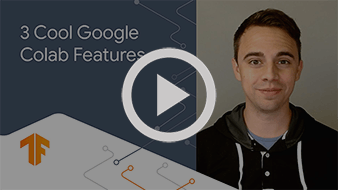
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

In [ ]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Sleep_health_and_lifestyle_dataset.csv')

# Display the first 5 rows of the DataFrame
print(df.head())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  Unnamed: 13  
0         126/83          77         4200           None          NaN  
1       

1. Handling Missing Values:

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Unnamed: 13'],
      dtype='object')

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Fill missing values with a specific value
df['Person ID'].fillna(0, inplace=True)


Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
Unnamed: 13                0.0
dtype: float64


2. Removing Duplicates:

In [ ]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()


0


3. Outlier Detection and Removal

In [ ]:
# Identify outliers using z-score
from scipy.stats import zscore
z_scores = zscore(df['Person ID'])
outliers = (z_scores > 3) | (z_scores < -3)
df = df[~outliers]


4. Standardizing/Normalizing Data:

In [ ]:
# Standardize data (z-score normalization)
df['Person ID'] = (df['Person ID'] - df['Person ID'].mean()) / df['Person ID'].std()

# Min-Max normalization
df['Gender'] = (df['Gender'] - df['Gender'].min()) / (df['Gender'].max() - df['Gender'].min())


CRUD Operations
1. Create New Record

In [ ]:
# Define a new record as a dictionary
new_record = {'Person ID': 1000, 'Gender': 'Male', 'Age': 30, 'Sleep Duration': 7, 'Health Score': 85}

# Append the new record to the DataFrame
df = df.append(new_record, ignore_index=True)


<ipython-input-18-7350d4400014>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_record, ignore_index=True)


2. Read records

In [ ]:
# Filter records based on a condition
filtered_df = df[df['Gender'] == 'Male']
print(filtered_df)


   Person ID Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
0     1000.0   Male   30        NaN             7.0               NaN   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                      NaN           NaN          NaN            NaN   

   Heart Rate  Daily Steps Sleep Disorder  Unnamed: 13  Health Score  
0         NaN          NaN            NaN          NaN          85.0  


In [ ]:
# Display specific columns
print(df[['Person ID', 'Sleep Duration']])

   Person ID  Sleep Duration
0     1000.0             7.0


In [ ]:
# Display the first 5 rows
print(df.head())

   Person ID Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
0     1000.0   Male   30        NaN             7.0               NaN   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                      NaN           NaN          NaN            NaN   

   Heart Rate  Daily Steps Sleep Disorder  Unnamed: 13  Health Score  
0         NaN          NaN            NaN          NaN          85.0  


In [ ]:
# Display all records
print(df)

   Person ID Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
0     1000.0   Male   30        NaN             7.0               NaN   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                      NaN           NaN          NaN            NaN   

   Heart Rate  Daily Steps Sleep Disorder  Unnamed: 13  Health Score  
0         NaN          NaN            NaN          NaN          85.0  


Update (Update existing record):

In [ ]:
# Assuming you want to update 'Column1' in the first row
df.at[1000, 'Sleep Duration'] = 0


In [ ]:
!pip install pandas numpy matplotlib seaborn



Part 2 Data Analysis



Import Lybrary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load dataset

In [ ]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Sleep_health_and_lifestyle_dataset.csv')


 Exploratory Data Analysis (EDA)
 Descriptive Statistics

In [ ]:
# Display basic statistics of the dataset
print(df.describe())


        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  \
count               374.000000    374.000000  374.000000    374.000000   
mean                 59.171123      5.385027   70.165775   6816.844920   
std                  20.830804      1.774526    4.135676   1617.915679   
min                  30.000000      3.000000   65.000000   3000.000000   
25%                  45.00

Correlation Matrix

<ipython-input-47-0a045df2c15e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


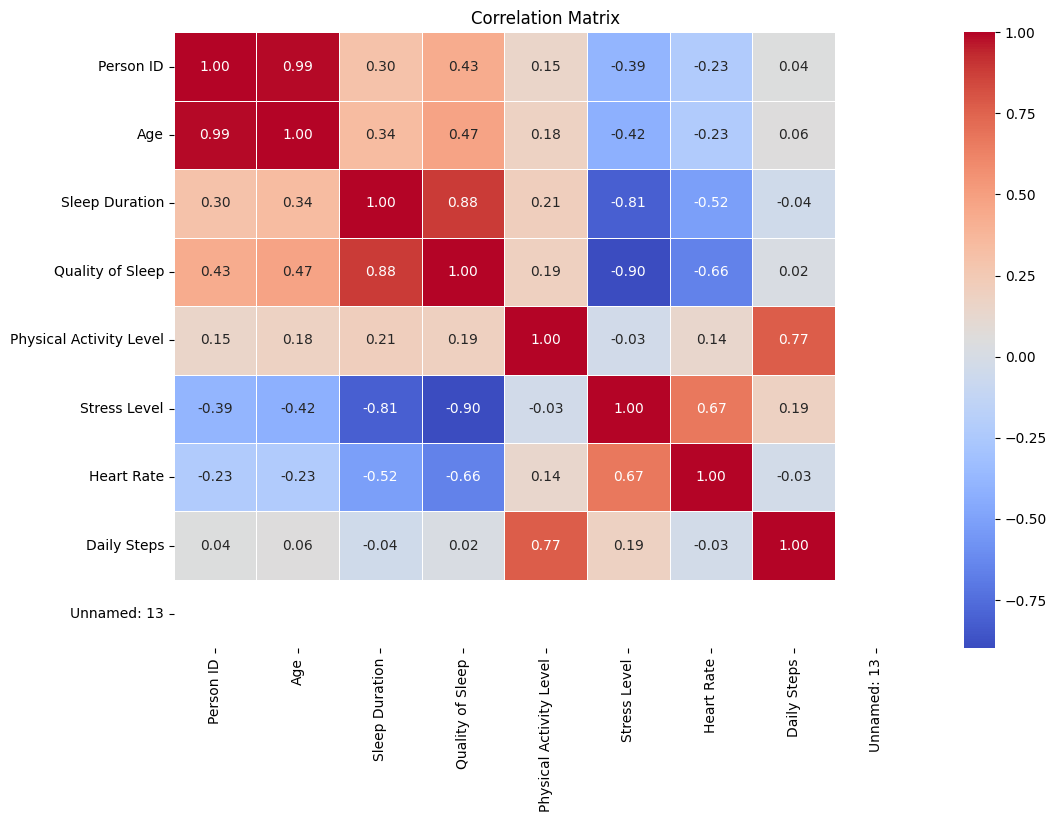

In [ ]:
# Calculate and visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Regression Analysis
Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Extract relevant columns
X = df[['Sleep Duration']]
y = df['Stress Level']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Sleep Duration Coefficient:', model.coef_[0])


Intercept: 18.285524412304753
Sleep Duration Coefficient: -1.8087973795463665


Multiple Linear Regression


In [ ]:
X_multi = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level']]
model_multi = LinearRegression()

model_multi.fit(X_multi, y)

# Print the coefficients
print('Intercept:', model_multi.intercept_)
print('Sleep Duration Coefficient:', model_multi.coef_[0])
print('Sleep Quality Coefficient:', model_multi.coef_[1])
print('Activity Level Coefficient:', model_multi.coef_[2])


Intercept: 15.365128692941001
Sleep Duration Coefficient: -0.23832161123436663
Sleep Quality Coefficient: -1.2351988774546325
Acrivity Level Coefficient: 0.01271621619905261


Visualisation

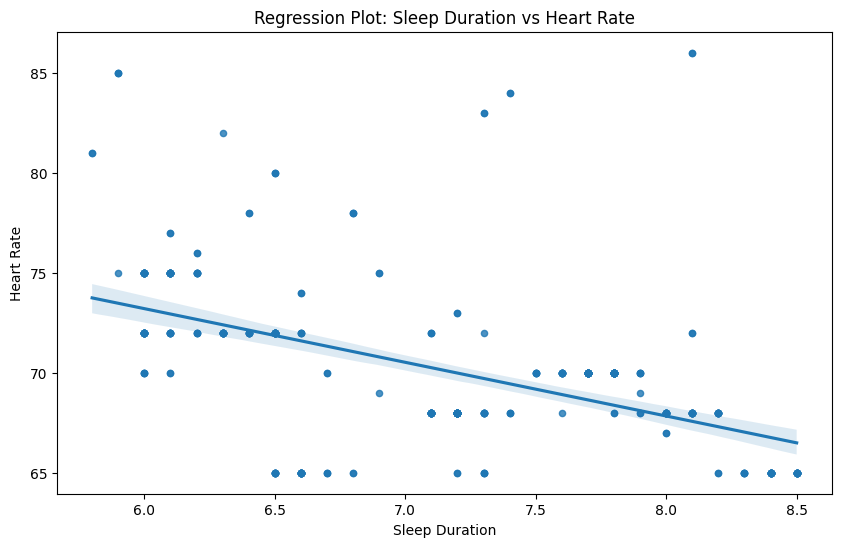

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Sleep Duration', y='Heart Rate', data=df, scatter_kws={'s': 20})
plt.title('Regression Plot: Sleep Duration vs Heart Rate')
plt.show()


Predictive Analysys


Handle Missing Values


In [ ]:
df.fillna(0, inplace=True)  # Replace NaN values with 0, or use another strategy


In [ ]:
print(df.head)

<bound method NDFrame.head of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   O

2 Select Features and Target Variable:


In [ ]:
X = df[['Sleep Duration', 'Quality of Sleep', 'Stress Level']]
y = df['Heart Rate']


Split Data


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


Fit The Model


In [ ]:
model.fit(X_train, y_train)



LinearRegression()

Make Prediction


In [ ]:
y_pred = model.predict(X_test)


Assess Model Performance:


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 10.40846110341943
R-squared: 0.4739659145845976


Interpretation


In [ ]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


            Feature  Coefficient
0    Sleep Duration     1.461389
1  Quality of Sleep    -1.331702
2      Stress Level     1.286685


Visualise Prediction

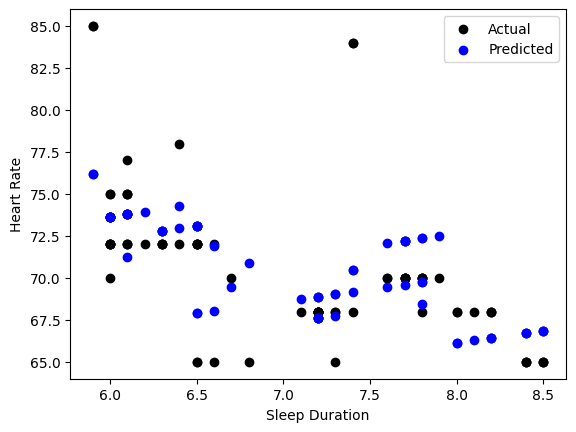

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test['Sleep Duration'], y_test, color='black', label='Actual')
plt.scatter(X_test['Sleep Duration'], y_pred, color='blue', label='Predicted')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()


In [ ]:
# Display the column names in the DataFrame
print(df.columns)


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Unnamed: 13'],
      dtype='object')
